# Simple Linear Regression 

Simple linear regression produces a model in the form:

ŷ = α + Bx

* ŷ - response variable (the value we are trying to predict)
* α - intercept
* B - regression coefficient
* x - predictor variable 

The linear regression algorithm accomplishes this by deriving a line formula that minimizes the differences between actual values and predicted values.  This algorithm is called **ordinary least-squares**, or **OLS**.

**Scikit-learn** Python module provides a LinearRegression function for doing this job.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
# For this exercise we will use a dataset of Nasdaq Apple Inc. Common Stock Historical Stock Prices
# https://www.nasdaq.com/symbol/aapl/historical
df = pd.read_csv("apple_stocks.csv")
df.head()

,date,close,volume,open,high,low
0,3/21/2018,171.27,36387880,175.04,175.09,171.2600
1,3/20/2018,175.24,19620520,175.24,176.80,174.9400
2,3/19/2018,175.30,32931110,177.32,177.47,173.6600
3,3/16/2018,178.02,38313330,178.65,179.12,177.6200
4,3/15/2018,178.65,22676520,178.50,180.24,178.0701


In [42]:
temp = df[['high','close']]
temp.head()

,high,close
0,175.09,171.27
1,176.80,175.24
2,177.47,175.30
3,179.12,178.02
4,180.24,178.65


<Axes: xlabel='high', ylabel='close'>

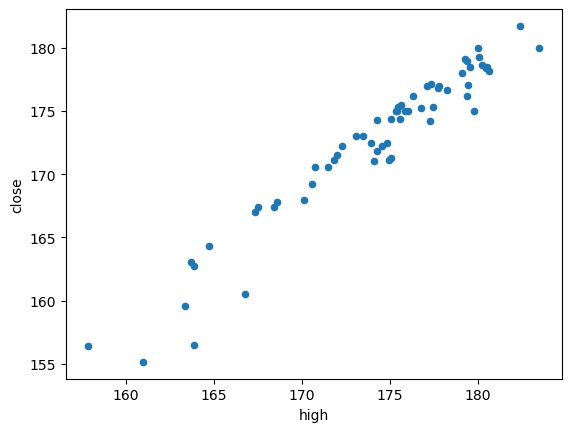

In [44]:
temp.plot.scatter(x='high', y='close')

In [46]:
temp[['high','close']].corr()

,high,close
high,1.000000,0.966223
close,0.966223,1.000000


<Axes: xlabel='high', ylabel='Count'>

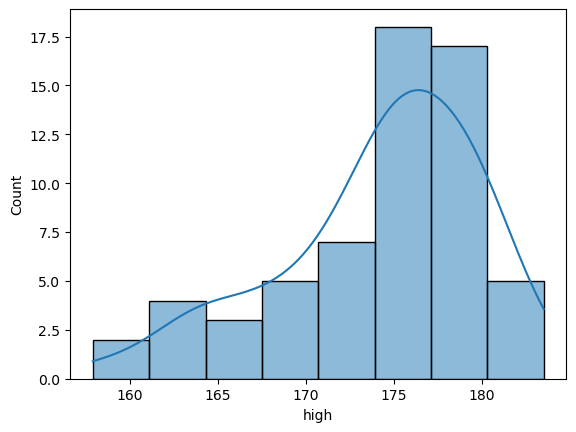

In [48]:
sns.histplot(data=temp['high'], kde=True)

<Axes: xlabel='close', ylabel='Count'>

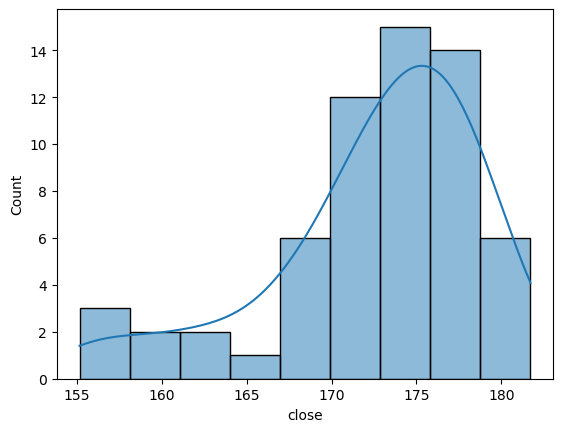

In [50]:
sns.histplot(data=temp['close'], kde=True)

In [52]:
# In this example, we will try to estimate the value of Apple stock at stock market closing
# using the value of it's highest cost during a given day.  In other words, we will try 
# to predict the value of 'close' using the value of 'high'
# To put this in machine learning / data mining terms, 'close' is our response variable and 
# 'high' our predictor variable
X = df[['high']]
y = df[['close']]

In [54]:
# Split Data
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [56]:
# Train Model
# Now we train our LinearRegression model using the training subset of data.

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, 
# which is an array of tuples of coefficients.
# Each regression coefficient shows the strength of the relationship between the predictor variable and the
# outcome variable while controlling for the other predictor variable 

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for high is 1.0746199659116504


In [60]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -14.705323911958232


Now that we know the regression coefficient for our predictor variable and the intercept, we can figure out our model:

ŷ = -14.71 + 1.074x



In [20]:
regression_model.predict([[180]])

array([[178.72626995]])

In [63]:
regression_model.predict([[3]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-11.48146401]])

## How good is our model - the $R^{2}$ statistic

A common method of measuring the accuracy of regression models is to use the $R^{2}$ statistic.

The $R^{2}$ statistic is defined as follows:

$R^{2}$ =  1 – (RSS/TSS)

* The RSS (Residual sum of squares) measures the variability left unexplained after performing the regression
* The TSS (Total sum of squares) measues the total variance in Y
* Therefore the $R^{2}$ statistic measures proportion of variability in Y that is explained by X using our model

The scale of $R^{2}$ statistic ranges from zero to one, with zero indicating that the proposed model **does not improve prediction over the mean model and one indicating perfect prediction**. Improvement in the regression model results in proportional increases in R-squared.

In [69]:
# R^2  can be determined using our test set and the model’s score method.

regression_model.score(X_test, y_test)

# This means that in our model, 93.3% of the variability in Y can be explained using X

0.933619809850739

In [71]:
df.head()

,date,close,volume,open,high,low
0,3/21/2018,171.27,36387880,175.04,175.09,171.2600
1,3/20/2018,175.24,19620520,175.24,176.80,174.9400
2,3/19/2018,175.30,32931110,177.32,177.47,173.6600
3,3/16/2018,178.02,38313330,178.65,179.12,177.6200
4,3/15/2018,178.65,22676520,178.50,180.24,178.0701
